In [28]:
# message
# currently sticking to election oriented


In [4]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
import nltk
# nltk.download('stopwords') #run once 
# nltk.download('punkt')
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

from emot.emo_unicode import UNICODE_EMOJI

In [8]:
from textblob import TextBlob

In [9]:
import re

In [33]:
# not quite useful

# count_hash = {}
# count_at = {}

# def count_tags(tweet_text):
#     hash_tag = re.findall(r"#(\w+)", tweet_text)
#     at_tag = re.findall(r"@(\w+)", tweet_text)
    
#     if(len(hash_tag)!=0):
#         for i in hash_tag: 
#             if i not in count_hash.keys():
#                 count_hash[i] = 1
#             else:
#                 count_hash[i] += 1    
        
#         for i in at_tag: 
#             if i not in count_at.keys():
#                 count_at[i] = 1
#             else:
#                 count_at[i] += 1   
        

In [6]:
query = "Donald Trump lang:en"

tweets_with_loc = []

tweets = []

fr = open("rejected_tweets_analysis.txt", "a")

for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):   
    if i>500:
        break

    else:
        if(len(tweet.content.split()) >= 10): #why 10
            if str(tweet.user.location) != "" :
                tweets_with_loc.append(str(tweet.user.location))
            tweets.append([tweet.date, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])
            # count_tags(tweet.content)
        else:
            fr.write(tweet.content + " " + str(len(tweet.content.split())) + "\n")
            # print(tweet.content, len(tweet.content.split()))

# print(tweets_with_loc) # 500 me se 284; with correct locations

/tmp/ipykernel_37783/1956846059.py:14: FutureWarning: content is deprecated, use rawContent instead
  if(len(tweet.content.split()) >= 10): #why 10
/tmp/ipykernel_37783/1956846059.py:17: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])
/tmp/ipykernel_37783/1956846059.py:20: FutureWarning: content is deprecated, use rawContent instead
  fr.write(tweet.content + " " + str(len(tweet.content.split())) + "\n")


In [10]:
df = pd.DataFrame(tweets, columns = ['date', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_retweet'])
df.to_csv('sentiment.csv')

In [6]:
# df = pd.read_csv('sentiment.csv')

In [22]:
# print(count_at)
# print()
# print(count_hash)

In [11]:
eng_stop_words = list(stopwords.words('english'))
emoji = list(UNICODE_EMOJI.keys())

In [12]:
# regex

def filtering(text):
    text = text.lower()

    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    
    # remove stop words
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]

    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)

    return text

# filtering("@kvenkat1680 @SecularFringe @GemsOfBollywood Those will loss Who were faking despite of political alignments. As per Hindenberg, Adani manipulated &; used a fake assets scene and https://www.sdhvb.com he is getting rewards for his deeds, no surprise. As per your views the super hit movies are unable to stay on screen for more than two weeks. #Truth")


In [13]:
df['filtered_tweets'] = df['tweet'].apply(filtering)

In [15]:
polar = 0
pos = neu = neg = 0

def polarity(tweet):
    global polar, pos, neu, neg
    curr_pol = TextBlob(tweet).sentiment.polarity
    
    if curr_pol > 0 : pos += 1
    elif curr_pol == 0 : neu += 1
    else : neg += 1

    polar += curr_pol
    return curr_pol

df['polarity'] = df['filtered_tweets'].apply(polarity)
# df.head(20)


In [17]:
print("sentiment polarity : ", polar*100 / len(tweets))
print("percentage of positive tweets :", pos*100 / len(tweets))
print("percentage of neutral tweets :", neu*100 / len(tweets))
print("percentage of negative tweets :", neg*100 / len(tweets))

sentiment polarity :  0.7466165808960569
percentage of positive tweets : 37.33624454148472
percentage of neutral tweets : 28.820960698689955
percentage of negative tweets : 33.842794759825324


In [19]:
df.to_csv('sentiment.csv', mode = 'w')

In [75]:
# problem : on scale of hundread polarity is not mattering !?
# wordcloud - donald -trump

# emojis express a lot
# subjectivity

# graphs 
# polarity of trump vs biden
# positive neutral and negative tweets for trump vs biden


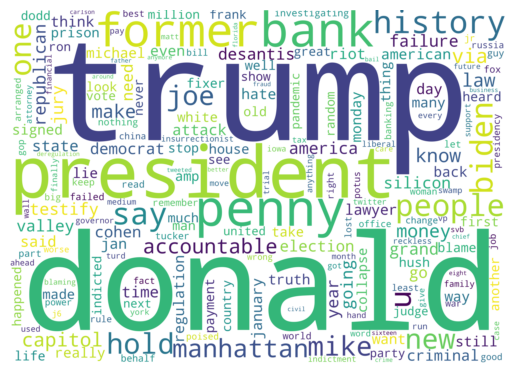

In [20]:
tweets_string = df['filtered_tweets'].tolist()
tweets_string = " ".join(tweets_string)

w_cloud = WordCloud(collocations = False, max_words=200, background_color = 'white', width = 7000, height = 5000).generate(tweets_string)
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()